In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy.random as rd
import numpy.linalg as LA

## 1. Data Filtering

In [33]:
# Importing the dataset

df = pd.read_csv("/content/clustering_data.csv",low_memory = False)

# Filtering the data corresponding to home state
filtered_df = df[df["StateName"] == 'TELANGANA'].copy()




In [34]:
# Check for NaN values in the "Latitude" and "Longitude" columns
filtered_df = filtered_df.dropna(subset=["Latitude", "Longitude","Pincode"]).copy()

filtered_df = filtered_df.drop_duplicates()

# Converting the Required columns to float datatype
filtered_df["Latitude"] = filtered_df["Latitude"].astype(float)
filtered_df["Longitude"] = filtered_df["Longitude"].astype(float)
filtered_df["Pincode"] = filtered_df["Pincode"].astype(float)

# Removing the outliers that donot lie in the latitude and longitude range of the state
lat_cond = (filtered_df["Latitude"] >= 15.5) & (filtered_df["Latitude"] <= 20)
lon_cond = (filtered_df["Longitude"] >= 77) & (filtered_df["Longitude"] <= 82)

filtered_df = filtered_df[lat_cond & lon_cond]

# Converting to numpy arrays and merginng them to form a nx2 matrix of coordinates
latitudes = filtered_df["Latitude"].to_numpy()
longitudes = filtered_df["Longitude"].to_numpy()

coordinates = np.column_stack((latitudes,longitudes))


## 2. Data Visualization

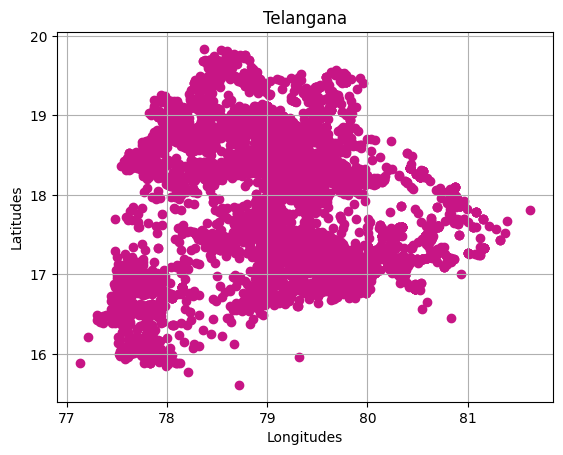

In [ ]:
# Plotting the data in Longitudes vs Latitudes map

plt.figure()
plt.scatter(longitudes,latitudes, color = '#C71585')
plt.xlabel("Longitudes")
plt.ylabel("Latitudes")
plt.title("Telangana")
plt.grid()
plt.show()


## 3. Clustering Analysis

In [ ]:
# A function that returns nearest centroids and their distances from a given set of coordinates

def calculate_nearest_centroid(k , centroids , coordinates):

  nearest_centroids = np.zeros(len(coordinates))

  nearest_distances = np.zeros(len(coordinates))

  for i in range(len(coordinates)):

    distances = np.zeros(k)

    distances = LA.norm( coordinates[i] - centroids , axis = 1)

    nearest_centroids[i] = np.argmin(distances)

    nearest_distances[i] = np.min(distances)

  return nearest_centroids , nearest_distances


### The initialization of centroids here is done thorugh the k-means++ algorithm where the first point is chosen randomly and thereafter each centroid is chosen randomly from the set of points by assigning a probability proportional to square of distance of the points from their nearest centroids.

In [ ]:
# A function to initialize centroids using the k-means++ algorithm

def initialize_centroids(k , coordinates):

  initial_centroid = np.zeros((k,2))

  # Choosing the first one ranomdly
  idx = rd.choice(range(len(coordinates)))

  initial_centroid[0] = coordinates[idx]

  for i in range(1,k) :

      distances = calculate_nearest_centroid(k , initial_centroid , coordinates)[1] # Holds the nearest distance of each point from the already set centroids.

      # Assigning probabilities
      squared_distances = distances ** 2

      probabilities = squared_distances / np.sum(squared_distances)

      # Choosing the centroid.
      initial_centroid[i] = coordinates[rd.choice(range(len(coordinates)), p = probabilities)]

  return initial_centroid

### Implementation of the k-means algorithm

In [ ]:
def k_means_implementation(k , coordinates):

  # Initializing the first set of centroids.
  centroids = initialize_centroids(k , coordinates)

  while(1):
    # nearest_centroids will contain the index (in [0,k-1]) of its nearest centroid and nearest_centroid_distances will contain the corresponding nearest distances.
    nearest_centroids , nearest_centroid_distances = calculate_nearest_centroid(k , centroids , coordinates)

    # Updating centroids by computing the mean of all points assigned to each cluster
    new_centroids = np.zeros((k,2))

    for i in range(k):

      cluster_indices = np.where(nearest_centroids == i) # Filtering out the coordinates assigned to each cluster

      new_centroids[i] = np.mean(coordinates[cluster_indices] , axis = 0) # Computing their mean

    # Checking for convergence
    if np.allclose(centroids, new_centroids, atol=1e-4):

      MSE_loss = np.mean(nearest_centroid_distances ** 2)# The function also reports the final loss as the total squared distance of points from their assigned centroids

      return centroids , nearest_centroids , MSE_loss

      break

    else :

      centroids = new_centroids # If does not converge then moves to next iteration.



### Adjusting the hyper-parameter k

In [ ]:
# Takes about 2 min to run
k_values = range(2,30)

# Finiding Loss values at different k-values
Loss = np.array([k_means_implementation(k , coordinates)[2] for k in k_values])

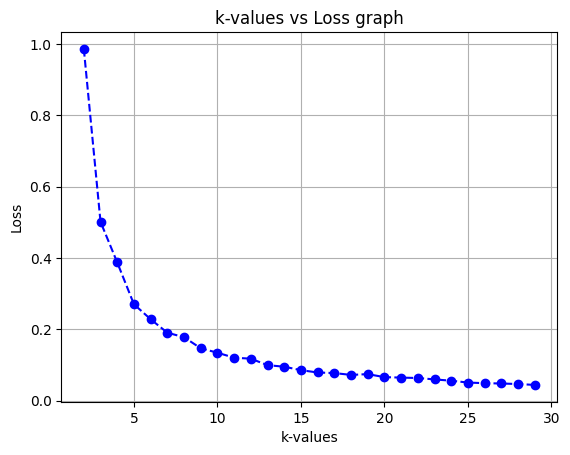

In [ ]:
# Plotting the k-values vs loss graph
plt.figure()
plt.plot(k_values , Loss , 'bo--')
plt.xlabel("k-values")
plt.ylabel("Loss")
plt.title("k-values vs Loss graph")
plt.grid()
plt.show()

### The elbow here can be considered to be at k = 5 as there is not a steep drop after it.

### Plotting the clusters for k = 5

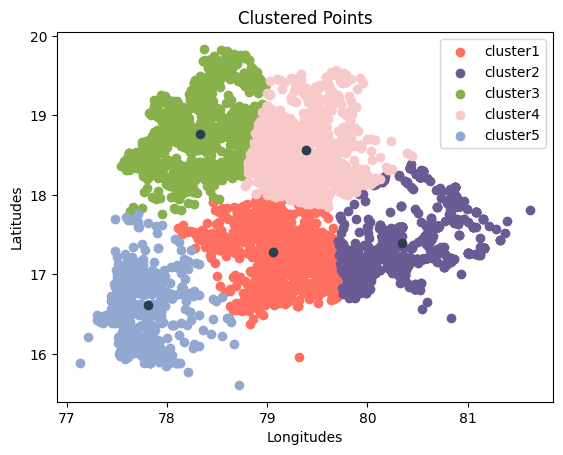

In [ ]:
# Implementing k-means for a k-value
k = 5
centroids , cluster_labels , loss = k_means_implementation(k,coordinates)


random_colors = np.array([
    '#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9', '#92A8D1',
    '#955251', '#B565A7', '#009B77', '#DD4124', '#45B8AC',
    '#EFC050', '#5B5EA6', '#9B2335', '#DFCFBE', '#BC243C',
    '#C3447A', '#98B4D4', '#D65076', '#6C4F3D', '#FFA07A',
    '#20B2AA', '#9370DB', '#3CB371', '#B22222', '#FF69B4',
    '#8FBC8F', '#BA55D3', '#CD853F', '#4682B4', '#DAA520'
])

# Plotting the clusters and centroids.
plt.figure()

for i in range(k):
    indices = np.where(cluster_labels == i)
    plt.scatter(coordinates[indices][:, 1], coordinates[indices][:, 0], color = random_colors[i] , label = f"cluster{i+1}")
    plt.scatter(centroids[i,1] , centroids[i,0] , color = "#2c3e50")

plt.xlabel("Longitudes")
plt.ylabel("Latitudes")
plt.legend()
plt.title("Clustered Points")
plt.show()


## Inference
* This graph indicates the density of post offices in Telangana. The gaps in the densities for example in the right most region or in the middle left region is due to the population density differences as shown in the following figure

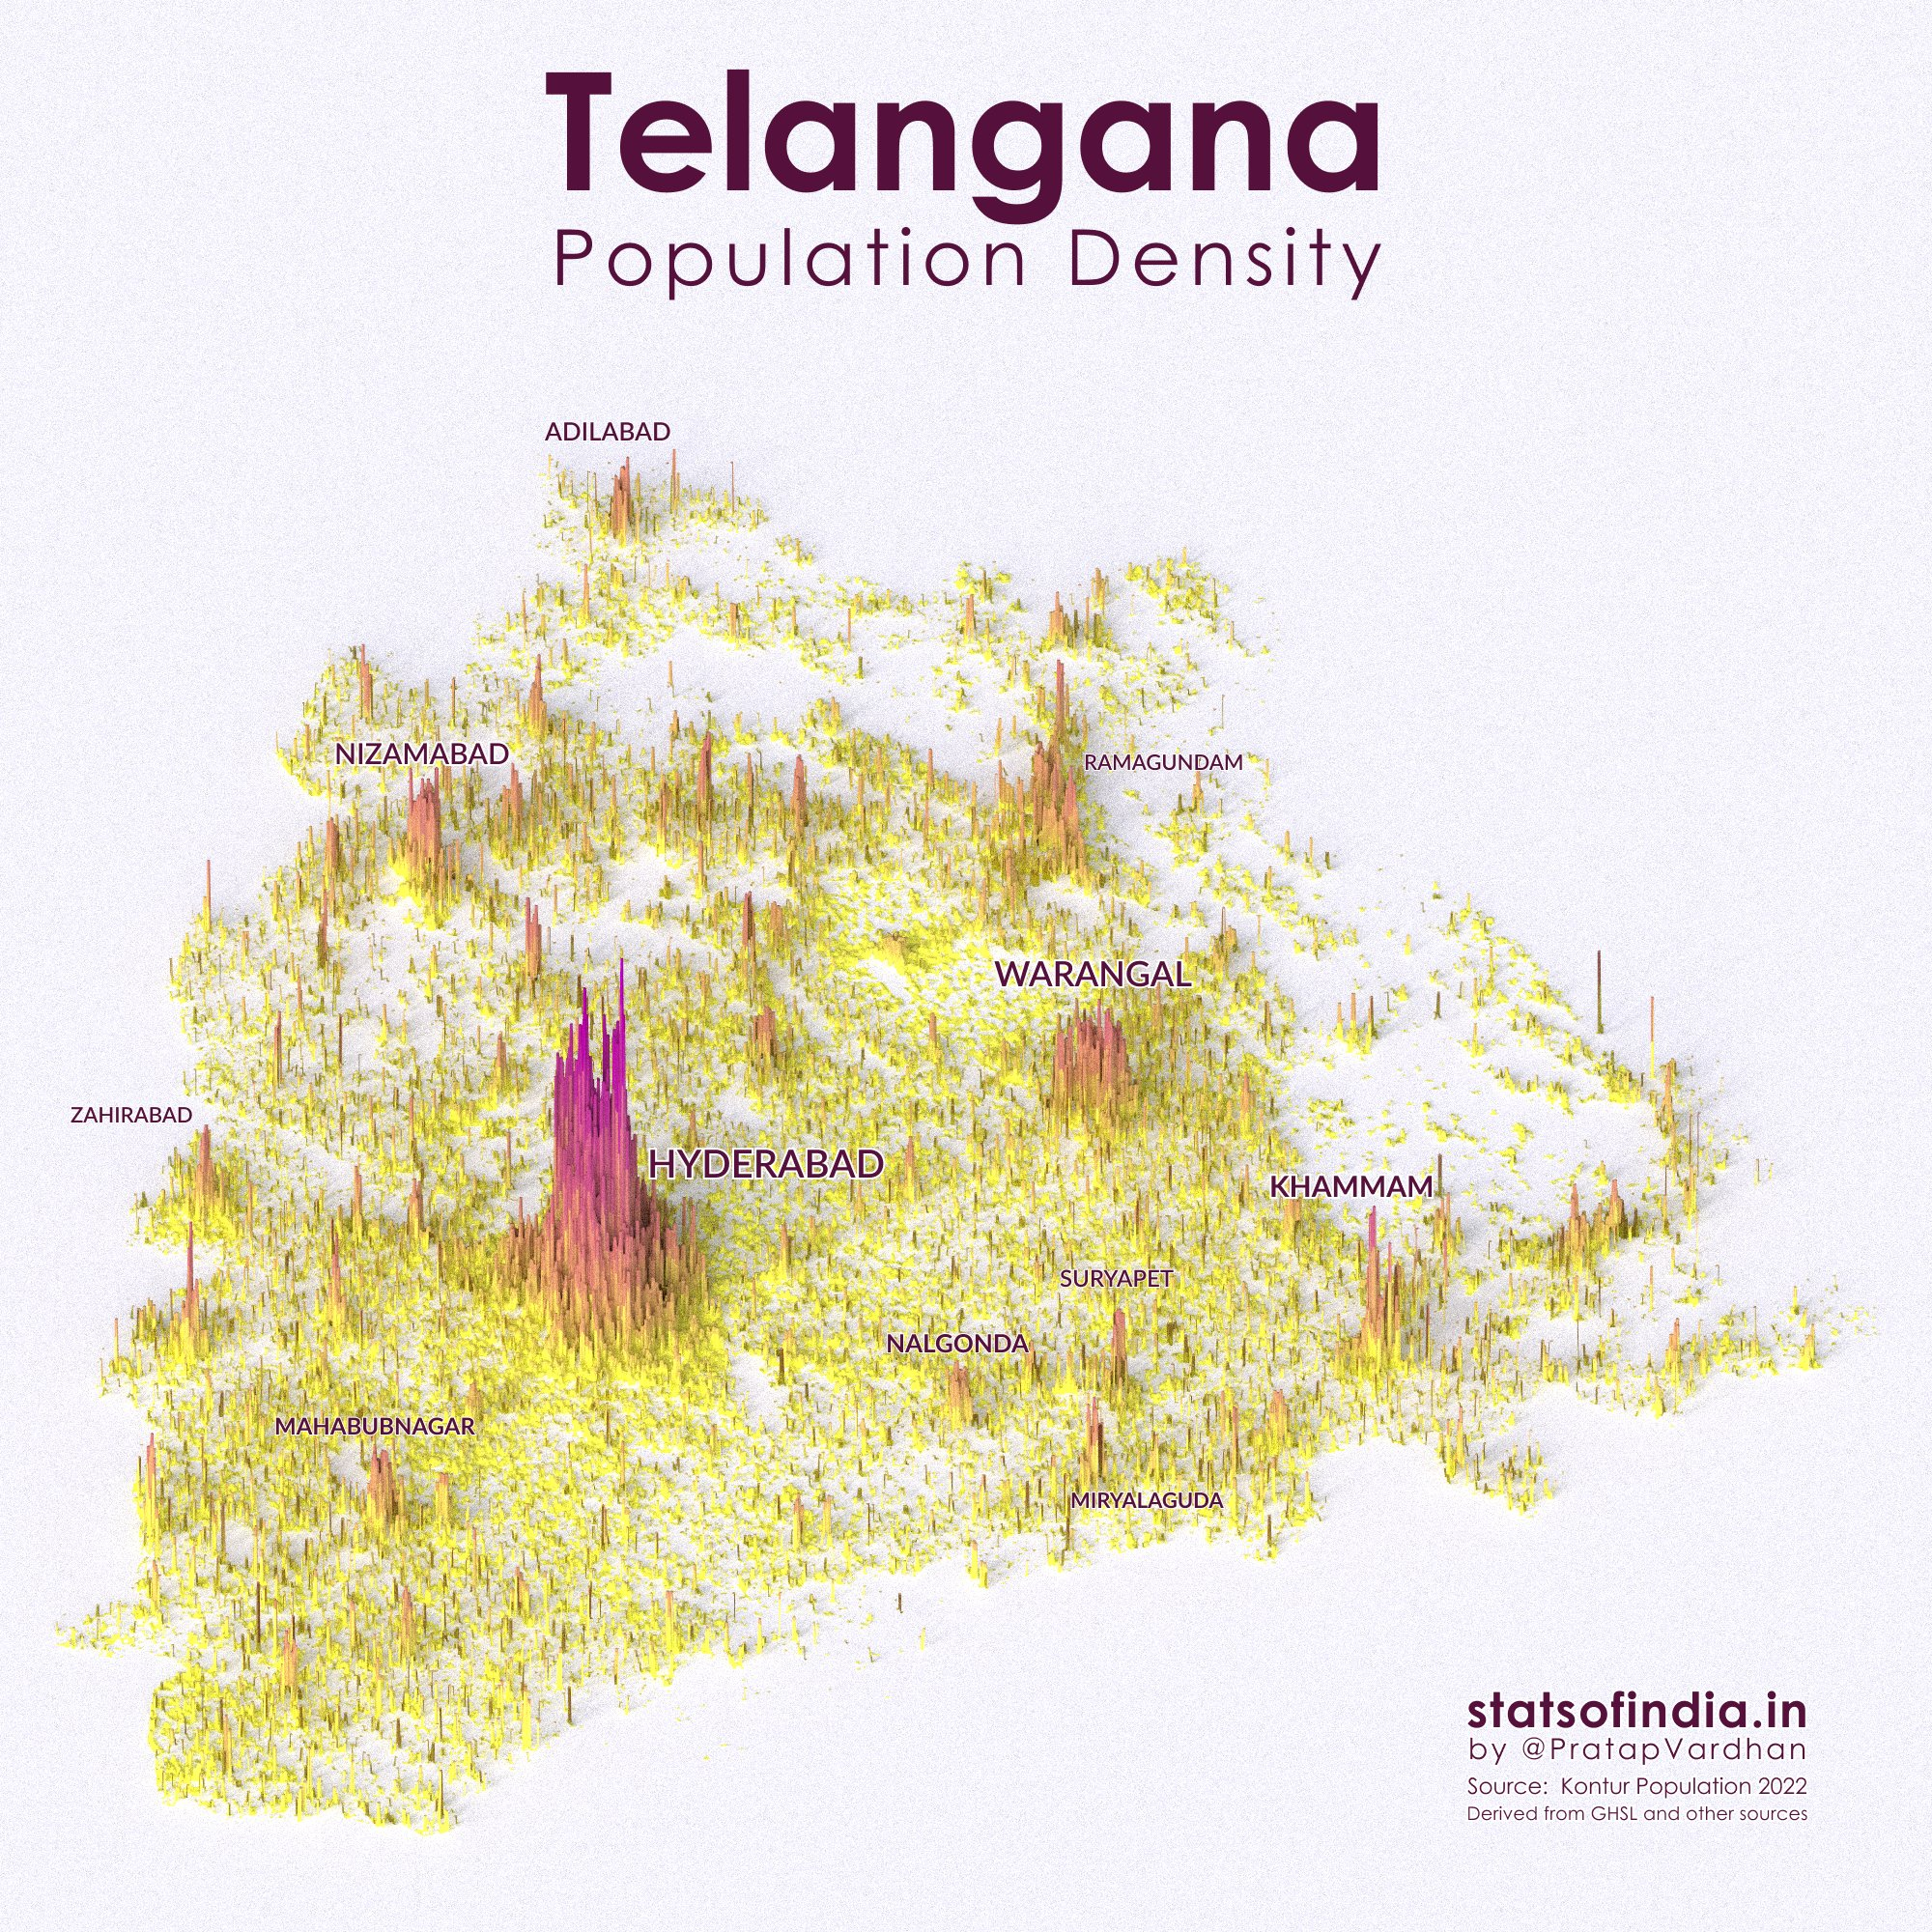

* The low density in popultaions for regions like Khammam and regions south to nizamabad can be related to the low density of post offices in the corresponding regions in the scatter plot.